### **Connecting to Google Drive and Importing Libraries**

In [1]:
# Mounting drive to our 'Data_606_Capstone' folder 

from google.colab import drive
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px
import plotly.graph_objects as go

### **Reading and Previewing Dataframe**

This dataset is sampled where we took 10% of the original 'business' dataset provided by Yelp to trim down the dataset for processing.

Further more, we have decided to focus solely on Philadelphia as the city in question and narrow down our results.



In [4]:
# Reading dataset in CSV Format 

yelp_philly = pd.read_csv("/content/drive/MyDrive/DATA_606_Capstone/Datasets/philly_df.csv.old")

In [45]:
yelp_philly.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,name,address,city,state,latitude,longitude,is_open,categories,review_count,postal_code
0,2,mCVyppNwK2qPOJHXgs0p2Q,mNITUu6B2wUKBOa4NmUHJg,NQSnr4RPUScss607oxOaqw,5,0,0,0,My brother came to visit and we wanted to pick...,2016-05-19 06:10:14,...,Chase's Hop Shop,7235 Rising Sun Ave,Philadelphia,PA,40.060386,-75.084590,1.0,"Chicken Wings, Nightlife, Bars, Delis, Food, B...",116,19111
1,11,g7MfpJGKQUGowCvIcrB91A,ci7Q6NvXQ8UZrBHusVX18g,V6Om7YZhlRQRU7WfuxHq8Q,4,1,0,0,A wee bit pricey for the portions they serve. ...,2017-07-08 21:23:54,...,Beck's Cajun Cafe,51 N 12th St,Philadelphia,PA,39.953322,-75.159000,1.0,"Restaurants, Cajun/Creole",485,19107
2,12,i8nVcu3u2-e0szyCS7PY1g,tGMnQ1EnvZqpn_jAuN8VsA,7sKfrJmjG6unAQeWdQUe2w,4,0,0,0,Love the sweet spiral plain pies at Franzones....,2015-10-23 19:16:20,...,Franzone's Pizzeria & Restaurant,114 Levering St,Philadelphia,PA,40.026465,-75.224496,1.0,"Pizza, Restaurants",110,19127
3,13,XDvCtch6U43HUNuMLHSxHA,AGyh5jnM0zrIElY7aZQafQ,5ezrDoezdUlJpUa5Jg6dUQ,5,0,0,0,Went here with a friend after having an incred...,2017-06-06 21:42:37,...,In the Valley,1615 E Passyunk Ave,Philadelphia,PA,39.929453,-75.163624,1.0,"Nightlife, Restaurants, Wine Bars, Bars, Tapas...",73,19148
4,14,gbK7d1rp0tLKPS8oMpKFNg,oMNtNOXYFN0qdSCSfOfTOg,7sKfrJmjG6unAQeWdQUe2w,5,0,0,0,I really like Franzone's. The owner is typical...,2016-07-14 23:24:19,...,Franzone's Pizzeria & Restaurant,114 Levering St,Philadelphia,PA,40.026465,-75.224496,1.0,"Pizza, Restaurants",110,19127


### **Dataframe Specs**

There are 55,415 rows and 28 columns as features such as business_id, review_id, name, and location information such as longitude and latitude coordinates.

In [46]:
yelp_philly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55415 entries, 0 to 55414
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       55415 non-null  int64  
 1   review_id        55415 non-null  object 
 2   user_id          55415 non-null  object 
 3   business_id      55415 non-null  object 
 4   stars            55415 non-null  int64  
 5   useful           55415 non-null  int64  
 6   funny            55415 non-null  int64  
 7   cool             55415 non-null  int64  
 8   text             55415 non-null  object 
 9   date             55415 non-null  object 
 10  text_cleaned     55415 non-null  object 
 11  stars_original   55415 non-null  int64  
 12  stars_predicted  55415 non-null  int64  
 13  pred_score       55415 non-null  float64
 14  keywords         55415 non-null  object 
 15  one count kw     55369 non-null  object 
 16  two count kw     32413 non-null  object 
 17  three count 

In [47]:
yelp_philly.isna().sum()

Unnamed: 0             0
review_id              0
user_id                0
business_id            0
stars                  0
useful                 0
funny                  0
cool                   0
text                   0
date                   0
text_cleaned           0
stars_original         0
stars_predicted        0
pred_score             0
keywords               0
one count kw          46
two count kw       23002
three count kw     48190
name                   0
address              230
city                   0
state                  0
latitude               0
longitude              0
is_open                0
categories             0
review_count           0
postal_code            0
dtype: int64

In [48]:
# Changing datatype for 'review_count' column to int64 from float64

yelp_philly["review_count"] = yelp_philly['review_count'].astype('int64')

In [49]:
yelp_philly.dtypes

Unnamed: 0           int64
review_id           object
user_id             object
business_id         object
stars                int64
useful               int64
funny                int64
cool                 int64
text                object
date                object
text_cleaned        object
stars_original       int64
stars_predicted      int64
pred_score         float64
keywords            object
one count kw        object
two count kw        object
three count kw      object
name                object
address             object
city                object
state               object
latitude           float64
longitude          float64
is_open            float64
categories          object
review_count         int64
postal_code          int64
dtype: object

In [50]:
# computing number of rows 
rows = len(yelp_philly.axes[0])

# computing number of columns
cols = len(yelp_philly.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  55415
Number of Columns:  28


### **Exploratory Data Analysis**

* 387 unique categories such as 'Chinese, Seafood, Hot Pot, Restaurants' and 'Pizza, Restaurants'

In [51]:
yelp_philly['categories'].nunique()

387

In [52]:
yelp_philly['categories'].tail()

55410    Candy Stores, Shopping, Department Stores, Fas...
55411    Bars, Nightlife, Restaurants, Pizza, Beer Bar,...
55412    Taiwanese, Nightlife, Bars, Asian Fusion, Rest...
55413               Chinese, Seafood, Hot Pot, Restaurants
55414    Candy Stores, Shopping, Department Stores, Fas...
Name: categories, dtype: object

* 416 unique businesses in the dataset after merging

In [53]:
yelp_philly['name'].nunique()

416

##### Distribution of Categories 

* The most popular categories are restaurants, food, and nightlife in the trimmed dataset.

In [54]:
categories = yelp_philly['categories'].dropna()
def to_1D(series):
    return pd.Series([x.strip() for _list in series for x in _list])

biz_categories = to_1D(categories.str.split(","))

In [55]:
biz_categories.value_counts()[:10]

Restaurants       52644
Food              24274
Nightlife         13456
Bars              12677
Coffee & Tea      10776
American (New)    10306
Beer               9932
Wine & Spirits     9932
Specialty Food     9364
Seafood            9024
dtype: int64

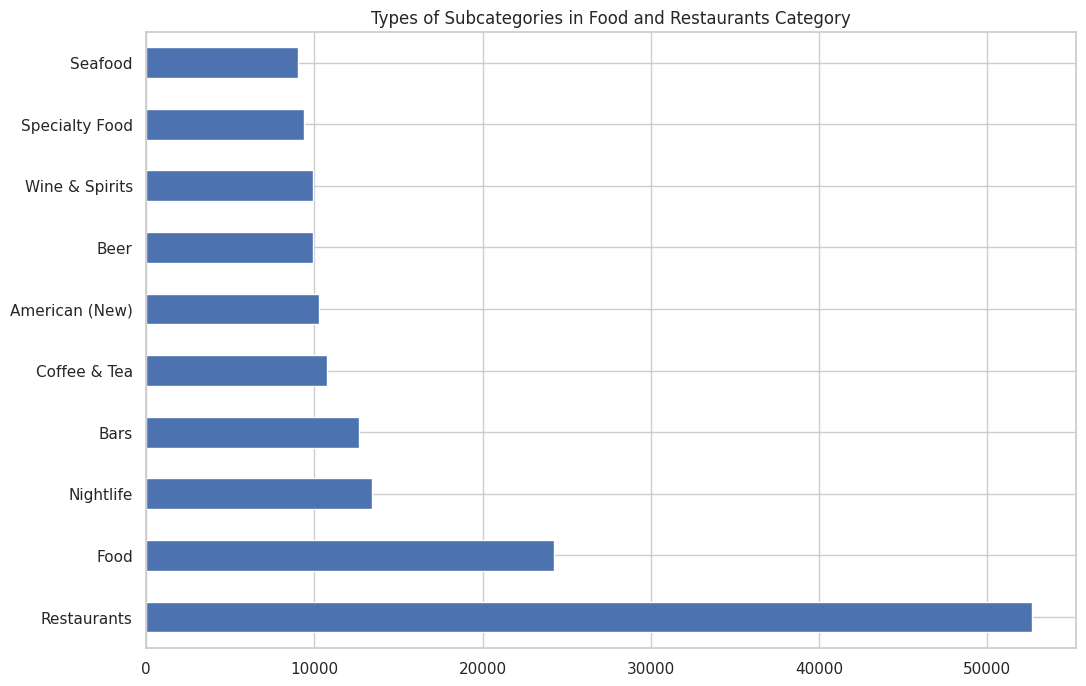

In [56]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')


ax = biz_categories.value_counts()[:10].plot(kind='barh');


plt.title('Types of Subcategories in Food and Restaurants Category');

#### Map of Businesses Located in the U.S.

In [38]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


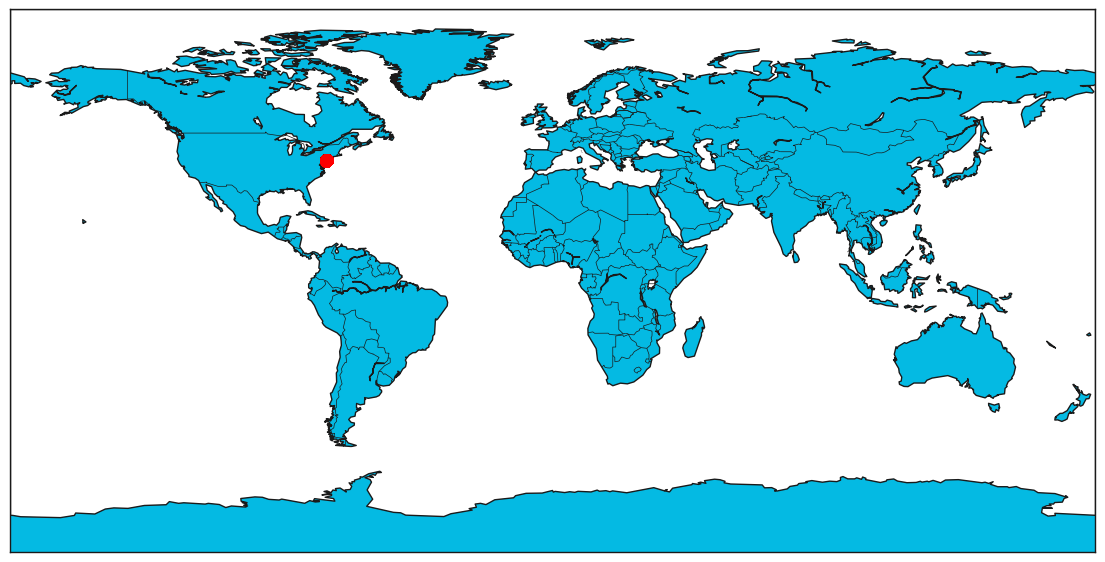

In [39]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(14, 8), edgecolor='w')
m = Basemap(projection='cyl',llcrnrlon= -180, urcrnrlon = 180, llcrnrlat = -90, urcrnrlat= 90,resolution='c',
           lat_ts = True)
m.drawcoastlines()
m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawcountries()
m.drawmapboundary(fill_color='#FFFFFF')

mloc = m(yelp_philly['latitude'].tolist(),
         yelp_philly['longitude'].tolist())

m.scatter(mloc[1],mloc[0],color ='red',lw=3,alpha=0.3,zorder=5)

Map of Businesses in Philadelphia

In [40]:
fig2=px.scatter_mapbox(yelp_philly, lat='latitude', lon='longitude', hover_name='name', zoom=10)
fig2.update_layout(mapbox_style='open-street-map')

#### Distribution of Rating

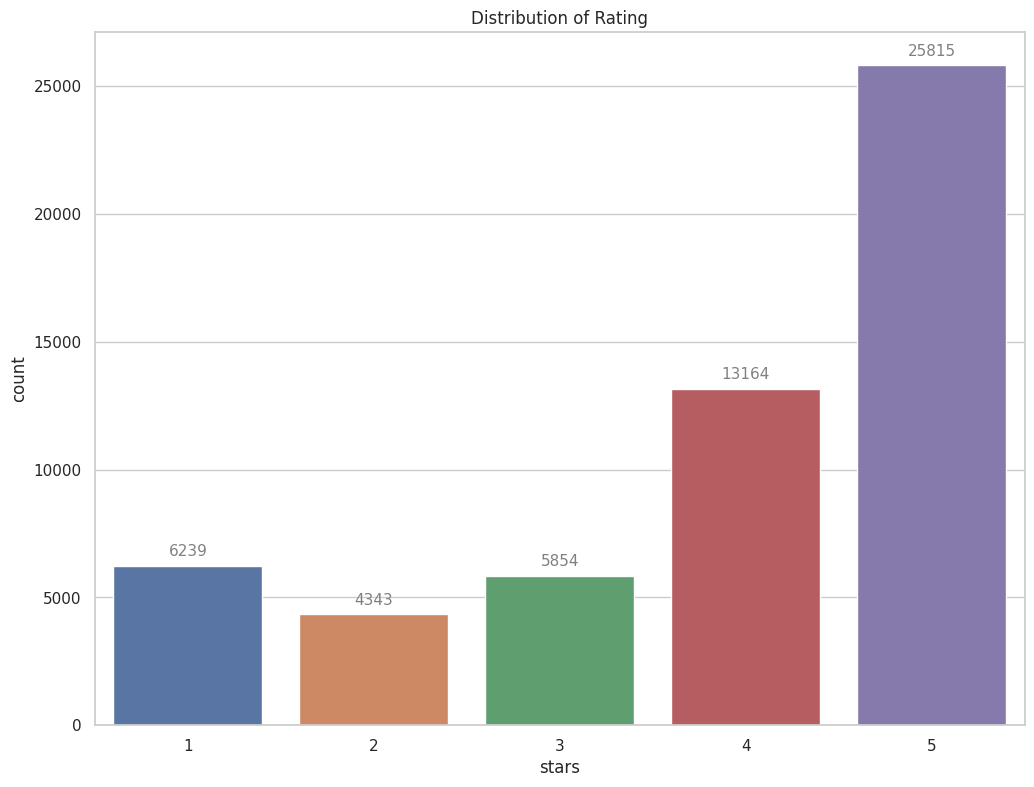

In [62]:
plt.figure(figsize=(12,9))
plt.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")

ax = sns.countplot(x = yelp_philly["stars"])

#to add numbers on top of the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray',
                xytext=(0, 10),
                textcoords='offset points')
                

plt.title('Distribution of Rating');

#### Average Review Count Per Business

In [42]:
# Average review count is 537 per business.

yelp_philly['review_count'].mean()

1077.1446539745557

Postal Codes

In [43]:
yelp_philly['postal_code'].nunique()

49

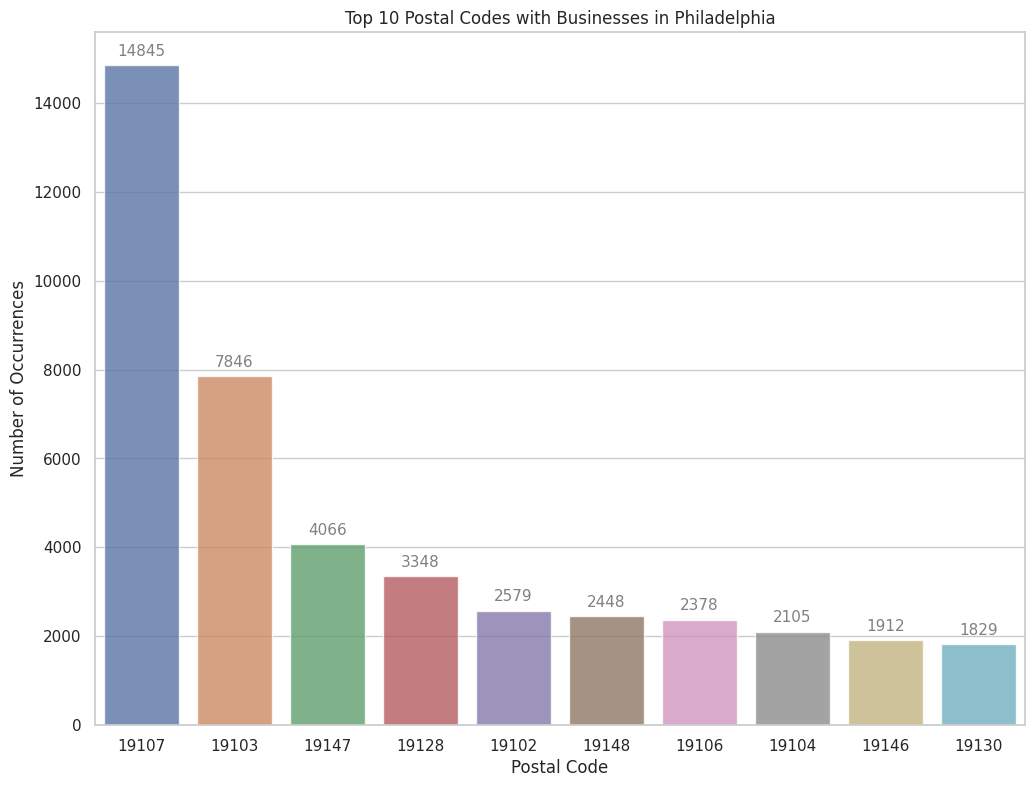

In [44]:
plt.figure(figsize=(12,9))

zipcodes_philly = (yelp_philly['postal_code'].value_counts())
zipcodes_philly = zipcodes_philly[:10,]

ax = sns.barplot(x = zipcodes_philly.index, 
            y = zipcodes_philly.values, 
            order = zipcodes_philly.index,
            alpha = 0.8)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray',
                xytext=(0, 10),
                textcoords='offset points')

 #s = ‘{:.0f}’.format(height)

plt.title('Top 10 Postal Codes with Businesses in Philadelphia')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Postal Code', fontsize=12)
plt.show()